In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from numpy import *

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D
from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils

In [0]:
from tqdm.notebook import tqdm

In [0]:
num_classes = 5

In [11]:
import tensorflow as tf
tf.test.gpu_device_name()

''

## **Import and Load Train**

In [0]:
Entire = os.listdir('/content/drive/My Drive/KananPark/Dataset/Train/Entire')
Flower = os.listdir('/content/drive/My Drive/KananPark/Dataset/Train/Flower')
Fruit = os.listdir('/content/drive/My Drive/KananPark/Dataset/Train/Fruit')
Leaf = os.listdir('/content/drive/My Drive/KananPark/Dataset/Train/Leaf')
Stem = os.listdir('/content/drive/My Drive/KananPark/Dataset/Train/Stem')

In [0]:
img_matrix = []
label = []

In [0]:
for file in tqdm(Entire) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Train/Entire' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(0)

In [0]:
for file in tqdm(Flower) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Train/Flower' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(1)

In [0]:
for file in tqdm(Fruit) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Train/Fruit' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(2)

In [0]:
for file in tqdm(Leaf) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Train/Leaf' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(3)

In [0]:
for file in tqdm(Stem) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Train/Stem' + '/' + file )).flatten()
   img_matrix.append(im)
   label.append(4)

In [0]:
np.savetxt('/content/drive/My Drive/KananPark/Dataset/img_matrix.csv', img_matrix)
np.savetxt('/content/drive/My Drive/KananPark/Dataset/label.csv', label)

## **Import and Load Test** 

In [0]:
Test_Entire = os.listdir('/content/drive/My Drive/KananPark/Dataset/Test/Entire')
Test_Flower = os.listdir('/content/drive/My Drive/KananPark/Dataset/Test/Flower')
Test_Fruit = os.listdir('/content/drive/My Drive/KananPark/Dataset/Test/Fruit')
Test_Leaf = os.listdir('/content/drive/My Drive/KananPark/Dataset/Test/Leaf')
Test_Stem = os.listdir('/content/drive/My Drive/KananPark/Dataset/Test/Stem')

In [0]:
test_matrix = []
test_label = []

In [0]:
for file in tqdm(Test_Entire) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Test/Entire' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(0)

In [0]:
for file in tqdm(Test_Flower) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Test/Flower' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(1)

In [0]:
for file in tqdm(Test_Fruit) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Test/Fruit' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(2)

In [0]:
for file in tqdm(Test_Leaf) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Test/Leaf' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(3)

In [0]:
for file in tqdm(Test_Stem) :
   im = np.array(Image.open('/content/drive/My Drive/KananPark/Dataset/Test/Stem' + '/' + file )).flatten()
   test_matrix.append(im)
   test_label.append(4)

In [0]:
np.savetxt('/content/drive/My Drive/KananPark/Dataset/test_matrix.csv', test_matrix)
np.savetxt('/content/drive/My Drive/KananPark/Dataset/test_label.csv', test_label)

## **Pre processing**

In [0]:
Train_data, Train_Label = shuffle(img_matrix,label , random_state = 2)
train_data = [Train_data, Train_Label]

In [0]:
Test_data, Test_Label = shuffle(test_matrix,test_label , random_state = 2)
test_data = [Test_data, Test_Label]

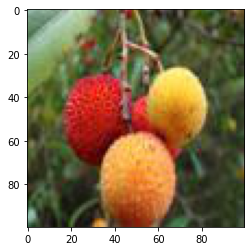

Label: 2


In [0]:
img = img_matrix[4256].reshape(100, 100, 3)
plt.imshow(img)
plt.show()
print('Label:', label[4256])

In [0]:
(X,y) = (train_data[0],train_data[1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [0]:
X_train = np.reshape(X_train, (np.shape(X_train)[0],3, 100, 100))
X_test = np.reshape(X_test, (np.shape(X_test)[0],3, 100, 100))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
X_train.shape

(7077, 3, 100, 100)

## **Model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape = X_train.shape[1:], data_format="channels_first"))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
opt = keras.optimizers.RMSprop(lr =0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [0]:
model.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 20,verbose = 1,
              validation_data=(X_test, Y_test),
              shuffle=True)

In [0]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2360/2360 [==============================] - 20s 8ms/step
Test loss: 13.522808967202396
Test accuracy: 0.16101694915254236
